In [3]:
import matplotlib.pyplot as plt

from ALLCools.clustering import tsne
from ALLCools.plot import *
from ALLCools.integration import SeuratIntegration
from wmb import brain

import scanpy as sc
import anndata
from harmonypy import run_harmony

## Parameters

In [4]:
dataset = 'AIBS_SMART'

In [5]:
ref_region_type = 'CEMBA'
query_region_type = dataset

## Load

In [6]:
adata_merge = anndata.read_h5ad('./adata/final.h5ad')
adata_merge

AnnData object with n_obs × n_vars = 166356 × 483
    obs: 'count', 'read_count', 'n_counts', 'leiden', 'Modality', 'L1_annot', 'DissectionRegion', 'L1_annot_transfer', 'DissectionRegion_transfer'
    var: 'mean-RNA', 'std-RNA'
    obsm: 'X_pca_integrate'

## Harmony for embedding

In [7]:
ho = run_harmony(data_mat=adata_merge.obsm['X_pca_integrate'],
                 meta_data=adata_merge.obs,
                 nclust=50,
                 vars_use=['Modality'], 
                 max_iter_harmony=30)

2022-09-07 04:49:20,293 - harmonypy - INFO - Iteration 1 of 30
2022-09-07 04:49:47,303 - harmonypy - INFO - Iteration 2 of 30
2022-09-07 04:50:07,213 - harmonypy - INFO - Converged after 2 iterations


In [8]:
adata_merge.obsm['X_harmony'] = ho.Z_corr.T

### TSNE

In [9]:
tsne(adata_merge, obsm='X_harmony')

### UMAP

In [10]:
adata_merge.obsm['X_pca'] = adata_merge.obsm['X_harmony']

sc.pp.neighbors(adata_merge)

In [11]:
min_dist = max(0.1, 1 - adata_merge.shape[0] / 60000)
sc.tl.umap(adata_merge, min_dist=min_dist)
del adata_merge.obsm['X_pca']

### Clustering

In [12]:
sc.tl.leiden(adata_merge, resolution=0.3)

## Plot

In [17]:
adata_merge.obs

,count,read_count,n_counts,leiden,Modality,L1_annot,DissectionRegion,L1_annot_transfer,DissectionRegion_transfer
SM-GE4RR_S339_E1-50,8070.0,626881.0,23087.0,2,RNA,AMY-Exc,OLF_COA_PAA_NLOT_TR,AMY-Exc,OLF_COA_PAA_NLOT_TR
SM-GE5NY_S003_E1-50,10279.0,573388.0,19625.0,2,RNA,AMY-Exc,OLF_COA_PAA_NLOT_TR,AMY-Exc,OLF_COA_PAA_NLOT_TR
SM-GE5NY_S121_E1-50,9587.0,586259.0,22210.0,2,RNA,AMY-Exc,OLF_COA_PAA_NLOT_TR,AMY-Exc,OLF_COA_PAA_NLOT_TR
SM-GE5NY_S195_E1-50,10946.0,428944.0,21171.0,2,RNA,AMY-Exc,OLF_COA_PAA_NLOT_TR,AMY-Exc,OLF_COA_PAA_NLOT_TR
SM-GE5NY_S196_E1-50,9312.0,517537.0,19250.0,2,RNA,AMY-Exc,OLF_COA_PAA_NLOT_TR,AMY-Exc,OLF_COA_PAA_NLOT_TR
...,...,...,...,...,...,...,...,...,...
999_95,NaN,NaN,NaN,2,merfish,NaN,NaN,Subcortical,HYmm
999_96,NaN,NaN,NaN,2,merfish,NaN,NaN,Subcortical,HYpm
999_97,NaN,NaN,NaN,2,merfish,NaN,NaN,Subcortical,HYpm
999_98,NaN,NaN,NaN,0,merfish,NaN,NaN,HY,HYpm


/opt/conda/lib/python3.7/site-packages/ALLCools/plot/categorical_scatter.py:225: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  **_scatter_kws,
/opt/conda/lib/python3.7/site-packages/ALLCools/plot/categorical_scatter.py:225: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  **_scatter_kws,


[Text(0.5, 1.0, 'merfish L1 transferred annot')]

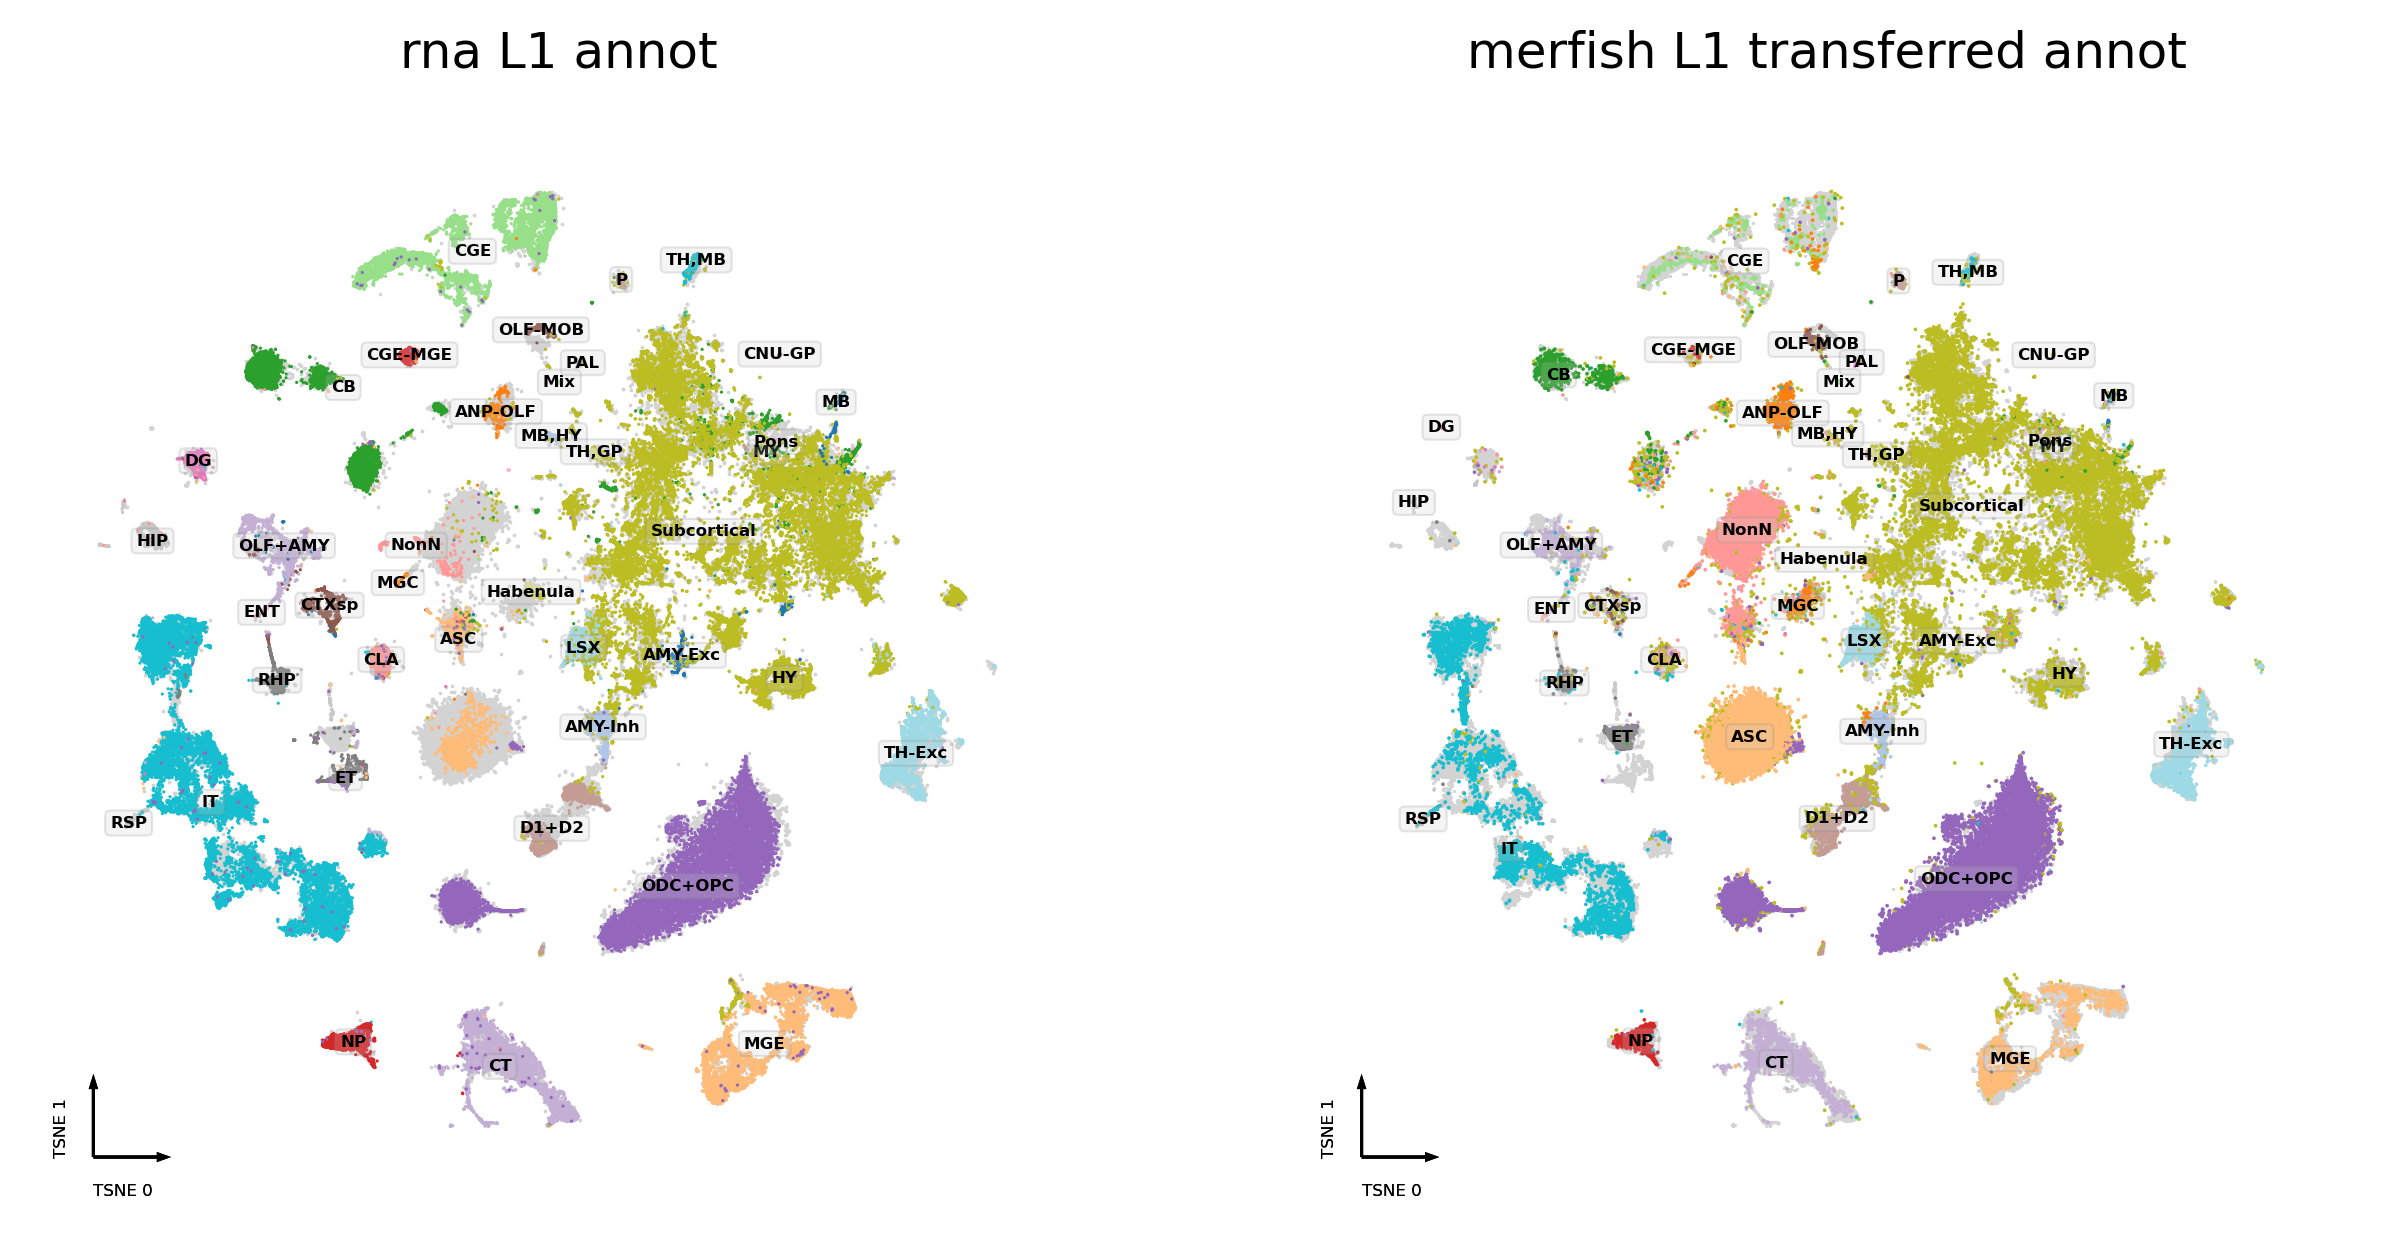

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 5),dpi=300)

merfish_adata = adata_merge[adata_merge.obs['Modality'] == 'merfish']
rna_adata = adata_merge[adata_merge.obs['Modality'] == 'RNA']

ax = axes[0]
categorical_scatter(data=merfish_adata,
                        coord_base='tsne',
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)

_ = categorical_scatter(
    data=rna_adata,
    ax=ax,
    coord_base='tsne',
    hue='L1_annot',
    text_anno='L1_annot',
    palette='tab20',
    max_points=None,)

ax.set(title = 'rna L1 annot')

    
    
ax = axes[1]
categorical_scatter(data=rna_adata,
                        coord_base='tsne',
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)

_ = categorical_scatter(
    data=merfish_adata,
    ax=ax,
    coord_base='tsne',
    hue='L1_annot_transfer',
    text_anno='L1_annot_transfer',
    palette='tab20',
    max_points=None,
)
ax.set(title = 'merfish L1 transferred annot')


/opt/conda/lib/python3.7/site-packages/ALLCools/plot/categorical_scatter.py:225: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  **_scatter_kws,
/opt/conda/lib/python3.7/site-packages/ALLCools/plot/categorical_scatter.py:225: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  **_scatter_kws,


[Text(0.5, 1.0, 'merfish L1 transferred DissectionRegion')]

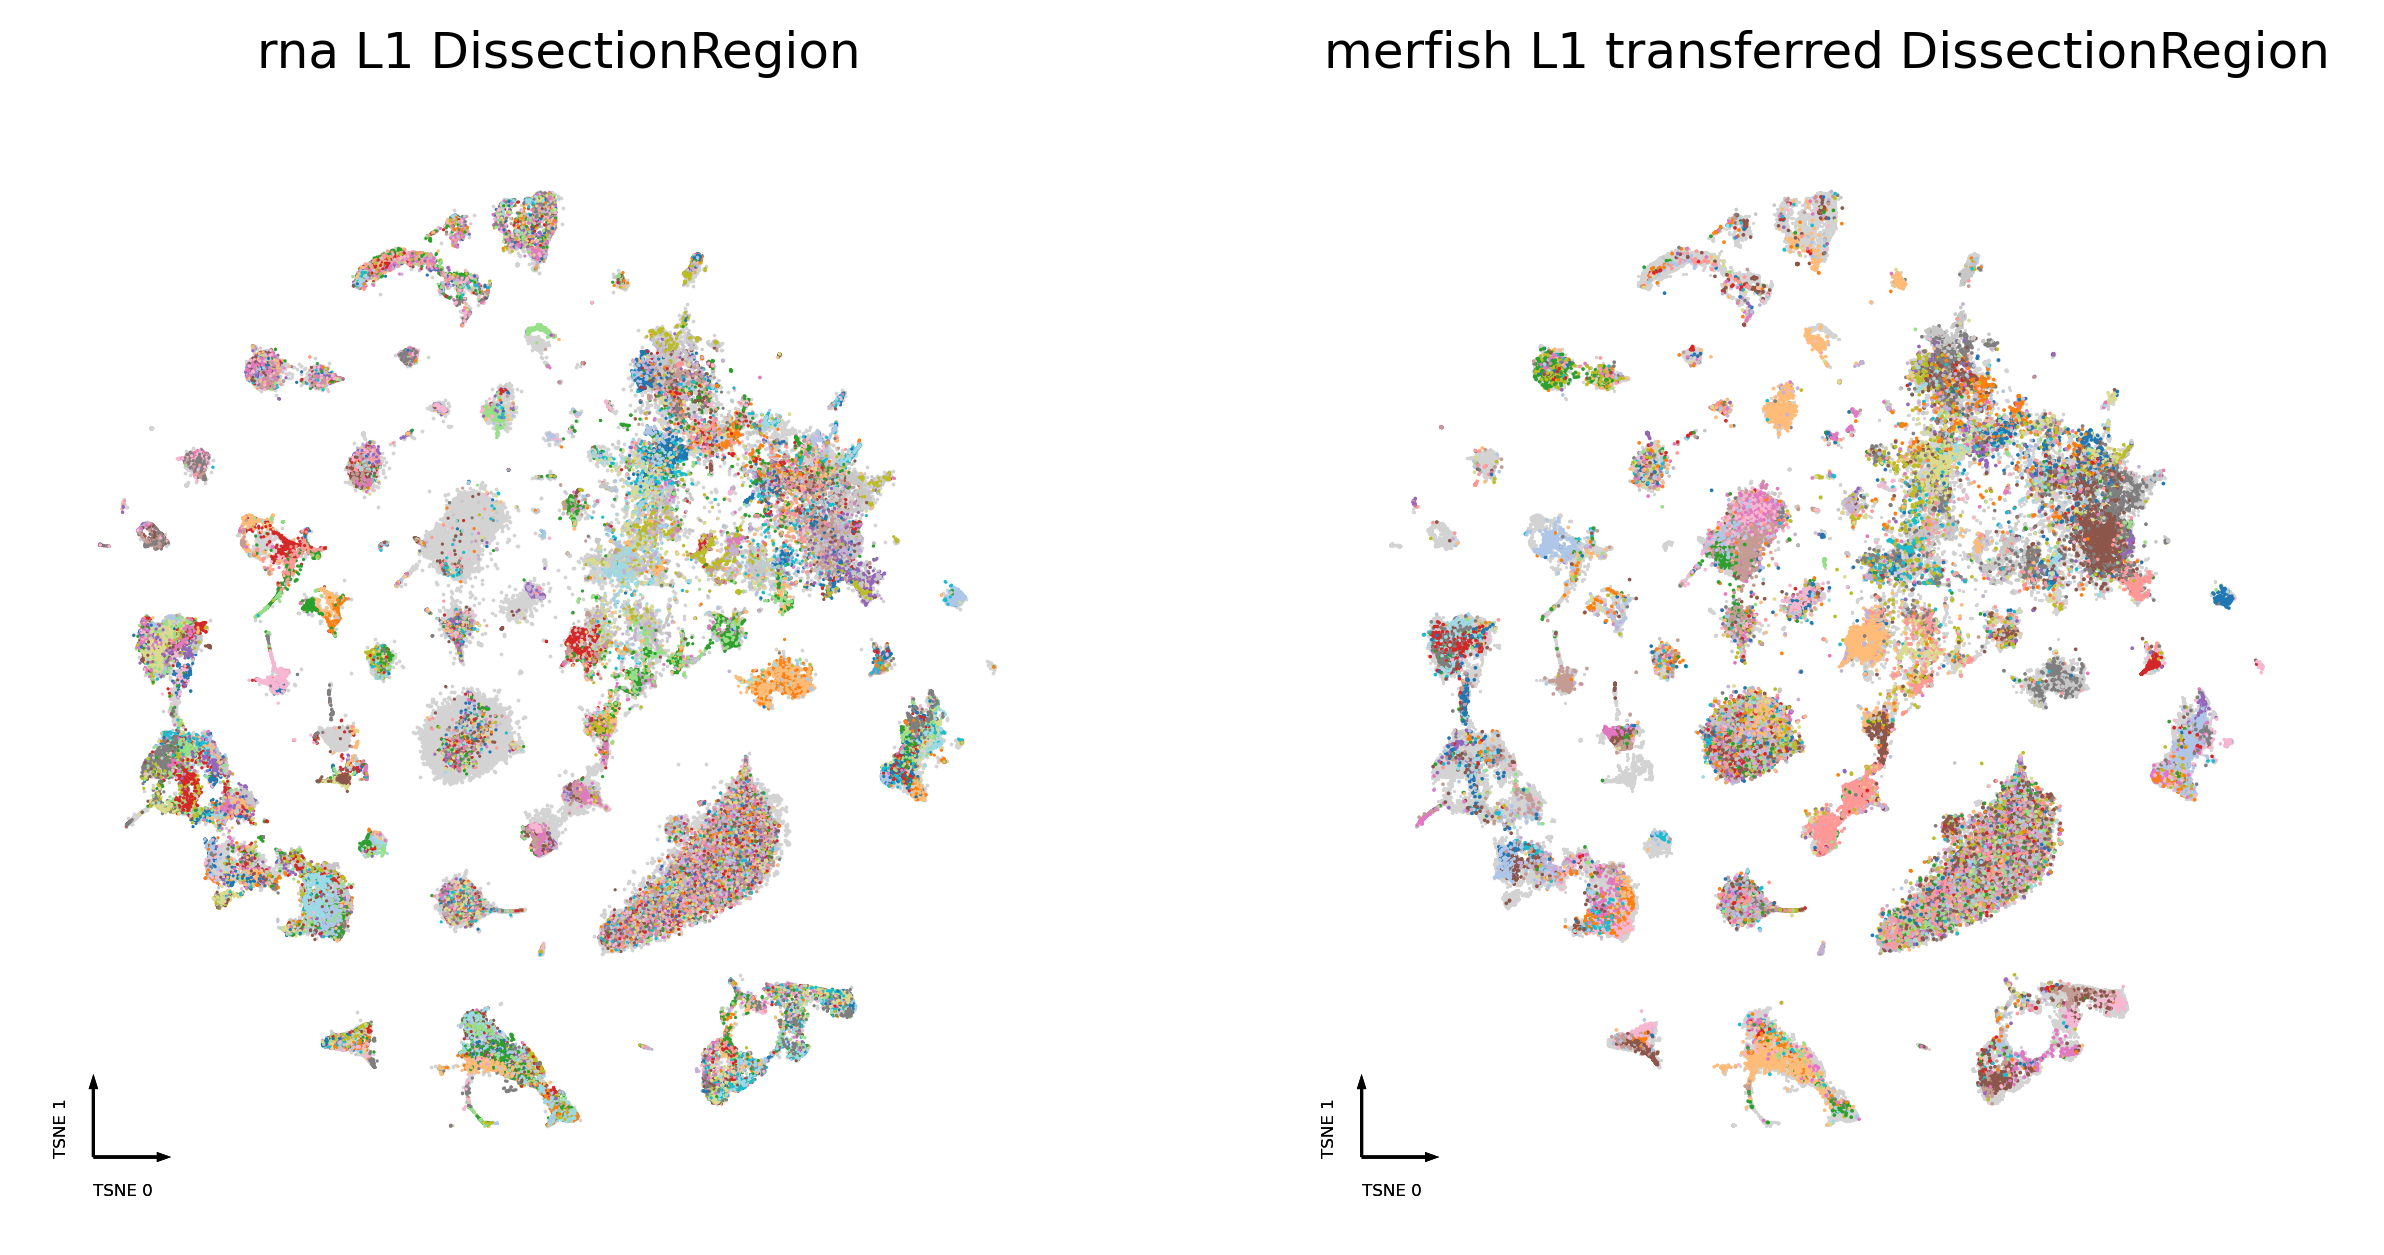

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10, 5),dpi=300)

merfish_adata = adata_merge[adata_merge.obs['Modality'] == 'merfish']
rna_adata = adata_merge[adata_merge.obs['Modality'] == 'RNA']

ax = axes[0]
categorical_scatter(data=merfish_adata,
                        coord_base='tsne',
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)

_ = categorical_scatter(
    data=rna_adata,
    ax=ax,
    coord_base='tsne',
    hue='DissectionRegion',
    #text_anno='DissectionRegion',
    palette='tab20',
    max_points=None,)

ax.set(title = 'rna L1 DissectionRegion')

    
    
ax = axes[1]
categorical_scatter(data=rna_adata,
                        coord_base='tsne',
                        max_points=None,
                        hue=None,
                        scatter_kws=dict(color='lightgrey'),
                        ax=ax)

_ = categorical_scatter(
    data=merfish_adata,
    ax=ax,
    coord_base='tsne',
    hue='DissectionRegion_transfer',
    #text_anno='DissectionRegion_transfer',
    palette='tab20',
    max_points=None,
)
ax.set(title = 'merfish L1 transferred DissectionRegion')


## Save

In [20]:
adata_merge.write_h5ad('./adata/final_with_coords.h5ad')

In [21]:
adata_merge

AnnData object with n_obs × n_vars = 166356 × 483
    obs: 'count', 'read_count', 'n_counts', 'leiden', 'Modality', 'L1_annot', 'DissectionRegion', 'L1_annot_transfer', 'DissectionRegion_transfer'
    var: 'mean-RNA', 'std-RNA'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca_integrate', 'X_harmony', 'X_tsne', 'X_umap'
    obsp: 'distances', 'connectivities'